# **Introduction**


**Customer churn is a critical concern for businesses across various industries, and the banking sector is no exception. The ability to predict and understand customer churn is essential for retaining valuable clients and optimizing business strategies.**

**In this analysis, we aim to build a machine learning model to predict customer churn using a Bank Customer Churn dataset. The dataset encompasses 10,000 records and 14 features, including demographic information, financial metrics, and customer behavior indicators.**

**The target variable, 'Churned' is binary, indicating whether a customer has churned (1) or not (0). Our objective is to explore and preprocess the data, perform exploratory data analysis (EDA), and leverage visualization techniques to gain insights into the factors influencing customer churn. Subsequently, we will employ various machine learning models to predict churn and evaluate their performance using accuracy metrics. Through this approach, we aim to provide actionable insights for the banking institution to enhance customer retention strategies and mitigate potential churn risks.**

# **Importing the Required Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

# **Loading the Dataset**

In [3]:
dataset = pd.read_csv("Churn_Modelling.csv")

# **Exploratory Data Analysis (EDA)**

**EDA allows us to gain a comprehensive overview of the data's structure, uncover potential patterns, and identify key trends. Throughout the EDA process, we will analyze the distribution of individual features, investigate correlations, and explore any inherent relationships between variables.** 

**Visualizations will play a crucial role in providing a clear representation of the data, offering insights into customer behavior and identifying the factors that may contribute to customer churn.**

In [4]:
# Checking the first 5 rows
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Checking the last 5 rows
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
dataset.shape

(10000, 14)

### **Checking Null Values and Duplicates in the Dataset**

**Before moving further with the analysis, it is essential to ensure the integrity of our dataset. We will begin by examining for any missing values and identifying potential duplicates. This step is crucial for maintaining data quality and setting the foundation for a robust exploratory data analysis (EDA) and subsequent machine learning model development.**

In [7]:
# checking null values in the dataset
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churned            0
dtype: int64

In [8]:
# Checking duplicates in the dataset
dataset.duplicated().sum()

0

**Our dataset does not have any null values and duplicates.**

**Now we can proceed with confidence, knowing that our dataset is clean and ready for further analysis.**

**Next, Lets check the names and some additional information about all the columns in our dataset.**

In [9]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churned'],
      dtype='object')

In [10]:
# Getting more information about the columns
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# Checking the datatypes of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**From the above steps, we observed that 3 columns in our dataset have non-numerical data types. Additionally, some columns seem to lack meaningful information. We will address these issues shortly.**

**Now, our target variable is "Churned".**

**Let's check how the target variable is distributed.**

In [12]:
dataset['Churned'].value_counts()

0    7963
1    2037
Name: Churned, dtype: int64

<AxesSubplot:xlabel='Churned', ylabel='count'>

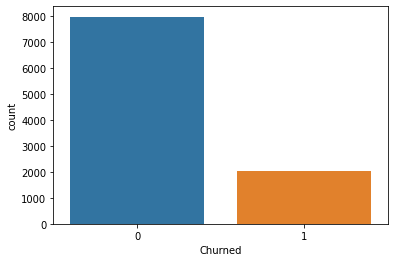

In [13]:
# Distribution of Target Variable
sns.countplot(x=dataset['Churned'])

**In the plot above, it is evident that the data is quite imbalanced. Our target variable 'Churned' exhibits class imbalance, with one class dominating the other. To address this issue and ensure balanced representation during model training, we will implement appropriate sampling techniques later.**

**Let's delve deeper into our dataset through additional visualizations. This step aims to enhance our understanding of the data, unveil patterns, and extract valuable insights that will contribute to the success of our machine learning model.**

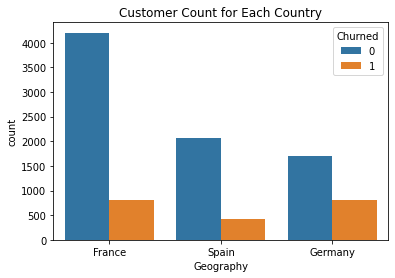

In [14]:
# Distribution of Geography
sns.countplot(x='Geography',hue='Churned',data=dataset)
plt.title("Customer Count for Each Country")
plt.show()

**The above plot reveals a substantial customer presence in France, surpassing other regions by a significant margin.**

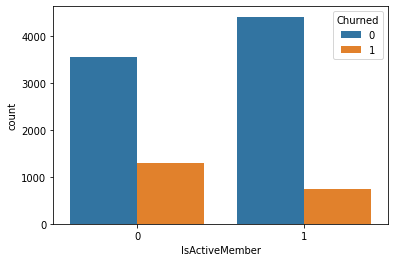

In [15]:
amp=sns.countplot(x = 'IsActiveMember', hue = 'Churned', data = dataset)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

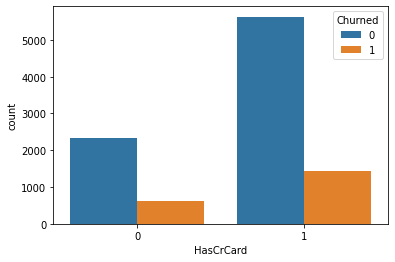

In [16]:
sns.countplot(x = 'HasCrCard', hue = 'Churned', data = dataset)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

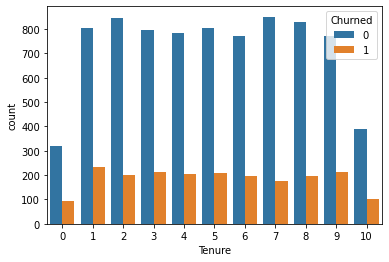

In [17]:
sns.countplot(x='Tenure',data=dataset,hue='Churned')

<AxesSubplot:xlabel='Age', ylabel='Count'>

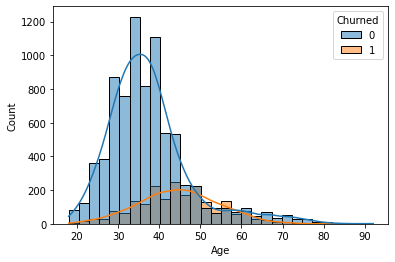

In [18]:
sns.histplot(x=dataset['Age'], bins=30,data=dataset, kde=True,hue='Churned')

<AxesSubplot:>

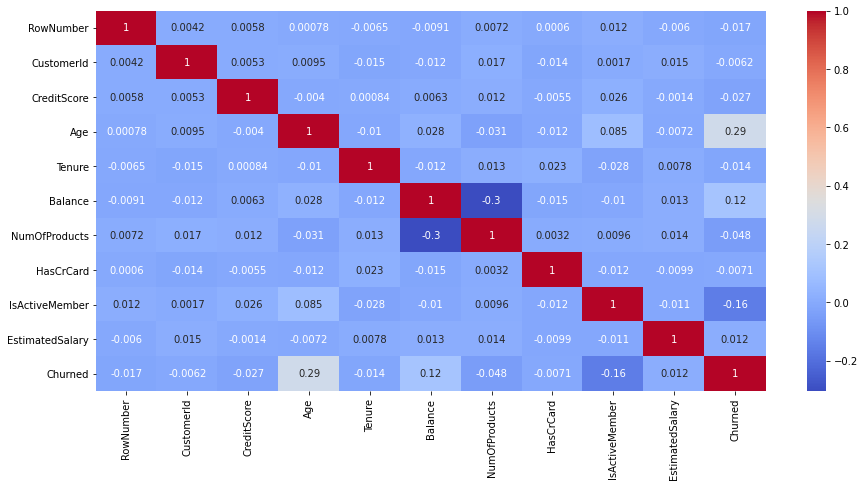

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(dataset.corr(), annot=True , cmap="coolwarm")

**Upon inspecting the heatmap, we can see that there is no significant correlation observed among the columns. As a result, no columns will be dropped solely based on correlation.**

### **Insights that we got from EDA :**

**1. No null values or duplicates were found in the dataset, ensuring its reliability.**

**2. There are some columns that don't provide any useful information and hence they won't contribute much to the predictions. Therefore, we will drop the following columns during Preprocessing : RowNumber, CustomerId, Surname.**

**3. The "Geography" and "Gender" columns are categorical variables in our dataset. We will use one-hot encoding to convert these categorical features into a numerical format.** 

**4. To ensure consistent scales for numerical features, we will employ StandardScaler during preprocessing.**

**5. The target variable, "Churned" exhibits imbalance. To address this, we will apply oversampling using SMOTE, ensuring fair representation for model training.**



# **Preprocessing**

**First, Let's drop the columns that don't provide any useful information for our predictions**

In [20]:
# Dropping irrelevant columns : RowNumber, CustomerId, Surname.

dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [21]:
# Lets print the first 5 rows and check if the irrelevant columns are dropped or not.
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **Encoding Categorical Variables**

**To convert categorical data into numerical, we will use the one-hot encoding technique.**

**This process involves assigning binary numeric values to each unique class present in columns with categorical data. By creating binary columns for each category, we ensure that our models can effectively interpret and utilize the categorical information during training and prediction.**

In [22]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [23]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


**Here, we used One Hot Encoding instead of Label Encoding because...**

**1. No Inherent Order: "Geography" has three unique countries, and "Gender" has two unique values. These categories don't have an inherent order or ranking. One-hot encoding is suitable for nominal categorical variables without a meaningful ordinal relationship.**


**2. Preservation of Independence: One-hot encoding preserves the independence of categories. Each category gets its own binary column, ensuring that the model doesn't infer false ordinal relationships between the categories.**

**3. Avoiding Misinterpretation: Label encoding might imply an ordinal relationship that doesn't exist. For example, if we label encode "Geography" as 0, 1, and 2, the model might incorrectly interpret that there is an ordinal relationship between the countries, which is not the case.**

**4. Interpretability: One-hot encoding provides a more interpretable representation of categorical variables. Each category is clearly represented by its own binary column, making it easier to understand the impact of each category on the model's predictions.**

# **Splitting the data into X and y**

**Now, we partition the dataset into two components: X and y.**

**The variable X encompasses all independent variables, representing the features that contribute to our predictions.**

**On the other hand, y encapsulates the dependent variable or target variable, serving as the outcome we aim to predict.**

In [24]:
X = dataset.drop('Churned', axis=1)
y = dataset['Churned']

# **Train-Test Split**

**We'll now split the dataset into training and testing data. We will do an 80:20 split, so our test size will be set to 0.2.**

**We will take Random State as 123. This will guarantee the reproducibility of our results across different runs.**

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

# **Standard Scaler**

**We will now use Standard Scaler to standardize the features of the dataset. This ensures that the consistency between the features of the dataset is maintained. Standardization is crucial for certain machine learning algorithms, promoting optimal model performance by mitigating the influence of varying magnitudes among features.**

In [26]:
numeric_columns = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']

In [27]:
sc = StandardScaler()

In [28]:
X_train[numeric_columns] = sc.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = sc.transform(X_test[numeric_columns])

In [29]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9385,0.382227,0.487923,1.033751,0.308125,0.825039,1,1,-1.712869,1,0,1
2155,0.101876,-0.379067,0.341382,0.394675,-0.914174,1,0,-1.409809,0,0,0
768,0.351077,0.198926,-1.043358,0.699392,0.825039,0,0,0.349622,0,1,1
6082,0.776796,0.102594,1.033751,0.448857,-0.914174,1,0,-0.664364,1,0,1
2926,-1.455629,2.318235,1.033751,-1.220239,0.825039,1,1,0.262719,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
926,0.911779,-0.379067,-0.697173,-1.220239,-0.914174,1,1,-1.471579,0,1,1
7779,1.109064,0.680587,-1.735728,-1.220239,0.825039,1,0,-1.091978,0,0,1
729,-1.569846,1.740242,-1.389543,-1.220239,-0.914174,0,0,0.542608,0,0,0
9719,-1.393329,0.776920,1.379936,0.835869,-0.914174,0,0,0.860115,1,0,0


In [30]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2375,1.711299,0.006262,0.341382,-1.220239,-0.914174,1,1,-0.261602,0,1,0
2821,0.662579,-0.571732,1.726121,0.432377,0.825039,1,1,-0.879423,0,1,0
6969,-0.323842,-0.090071,0.341382,-1.220239,0.825039,1,1,0.303177,0,1,0
4748,-1.175278,-0.186403,0.687566,1.318461,4.303467,1,1,0.304470,1,0,0
76,0.143410,1.547577,1.033751,-1.220239,0.825039,1,1,0.678184,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5315,0.340694,-0.282735,-0.004803,0.628363,-0.914174,1,1,0.384802,0,0,1
1606,-0.874161,0.102594,-1.043358,0.334299,0.825039,1,0,0.944911,1,0,0
8247,-1.507546,-1.342390,-0.004803,0.611027,0.825039,1,1,0.461775,1,0,0
1221,1.462098,-0.186403,-1.043358,1.404641,0.825039,1,0,-0.424088,0,0,1


# **Addressing the issue of Data Imbalance**

**We have data imbalance within our target variable. Initially, we will evaluate our model's accuracy in the presence of this imbalance.** 

**Then, to rectify the issue of imbalance, we implement the Synthetic Minority Over-sampling Technique (SMOTE) as an oversampling method.**  


**We will then compare the model accuracies before and after addressing the data imbalance using SMOTE, providing valuable insights into the impact of this preprocessing technique.**


# **Model Fitting with imbalance**

## **1. Logistic Regression**

In [31]:
logi = LogisticRegression()

In [32]:
logi.fit(X_train,y_train)

LogisticRegression()

In [33]:
logi_pred = logi.predict(X_test)

In [34]:
confusion_matrix(y_test,logi_pred)

array([[1528,   65],
       [ 311,   96]], dtype=int64)

In [35]:
accuracy_score(y_test,logi_pred)

0.812

In [36]:
print(classification_report(y_test,logi_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.60      0.24      0.34       407

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



In [37]:
print('Precision score:', precision_score(y_test,logi_pred)*100)
print('Recall score:', recall_score(y_test,logi_pred)*100)
print('F1-score:', f1_score(y_test,logi_pred)*100)
print('Accuracy:', accuracy_score(y_test,logi_pred)*100)

Precision score: 59.62732919254658
Recall score: 23.587223587223587
F1-score: 33.802816901408455
Accuracy: 81.2


## **2. Support Vector Classifier**

In [38]:
sv = SVC()

In [39]:
sv.fit(X_train,y_train)

SVC()

In [40]:
sv_pred = sv.predict(X_test)

In [41]:
confusion_matrix(y_test,sv_pred)

array([[1549,   44],
       [ 226,  181]], dtype=int64)

In [42]:
accuracy_score(y_test,sv_pred)

0.865

In [43]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [44]:
print('Precision score:', precision_score(y_test,sv_pred)*100)
print('Recall score:', recall_score(y_test,sv_pred)*100)
print('F1-score:', f1_score(y_test,sv_pred)*100)
print('Accuracy:', accuracy_score(y_test,sv_pred)*100)

Precision score: 80.44444444444444
Recall score: 44.47174447174447
F1-score: 57.27848101265822
Accuracy: 86.5


## **3. K Nearest Neighbour**

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
knn_pred = knn.predict(X_test)

In [48]:
confusion_matrix(y_test,knn_pred)

array([[1499,   94],
       [ 226,  181]], dtype=int64)

In [49]:
accuracy_score(y_test,knn_pred)

0.84

In [50]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1593
           1       0.66      0.44      0.53       407

    accuracy                           0.84      2000
   macro avg       0.76      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



In [51]:
print('Precision score:', precision_score(y_test,knn_pred)*100)
print('Recall score:', recall_score(y_test,knn_pred)*100)
print('F1-score:', f1_score(y_test,knn_pred)*100)
print('Accuracy:', accuracy_score(y_test,knn_pred)*100)

Precision score: 65.81818181818181
Recall score: 44.47174447174447
F1-score: 53.079178885630505
Accuracy: 84.0


## **4. Naive Bayes**

In [52]:
nb = GaussianNB()

In [53]:
nb.fit(X_train,y_train)

GaussianNB()

In [54]:
nb_pred = nb.predict(X_test)

In [55]:
confusion_matrix(y_test,nb_pred)

array([[1489,  104],
       [ 254,  153]], dtype=int64)

In [56]:
accuracy_score(y_test,nb_pred)

0.821

In [57]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1593
           1       0.60      0.38      0.46       407

    accuracy                           0.82      2000
   macro avg       0.72      0.66      0.68      2000
weighted avg       0.80      0.82      0.80      2000



In [58]:
print('Precision score:', precision_score(y_test,nb_pred)*100)
print('Recall score:', recall_score(y_test,nb_pred)*100)
print('F1-score:', f1_score(y_test,nb_pred)*100)
print('Accuracy:', accuracy_score(y_test,nb_pred)*100)

Precision score: 59.53307392996109
Recall score: 37.59213759213759
F1-score: 46.08433734939759
Accuracy: 82.1


# **Accuracy of models with imbalance**

In [59]:
final_data=pd.DataFrame({'Models':['LOGI','SVC','KNN','NB'],
                         'Accuracy':[accuracy_score(y_test,logi_pred),
                                     accuracy_score(y_test,sv_pred),
                                     accuracy_score(y_test,knn_pred),
                                     accuracy_score(y_test,nb_pred),],
                         'precision':[precision_score(y_test,logi_pred),
                                      precision_score(y_test,sv_pred),
                                      precision_score(y_test,knn_pred),
                                      precision_score(y_test,nb_pred),],
                         'Recall':[recall_score(y_test,logi_pred),
                                   recall_score(y_test,sv_pred),
                                   recall_score(y_test,knn_pred),
                                   recall_score(y_test,nb_pred),],
                         'F1-Score':[f1_score(y_test,logi_pred),
                                     f1_score(y_test,sv_pred),
                                     f1_score(y_test,knn_pred),
                                     f1_score(y_test,nb_pred),]})

In [60]:
final_data

,Models,Accuracy,precision,Recall,F1-Score
0,LOGI,0.812,0.596273,0.235872,0.338028
1,SVC,0.865,0.804444,0.444717,0.572785
2,KNN,0.840,0.658182,0.444717,0.530792
3,NB,0.821,0.595331,0.375921,0.460843


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

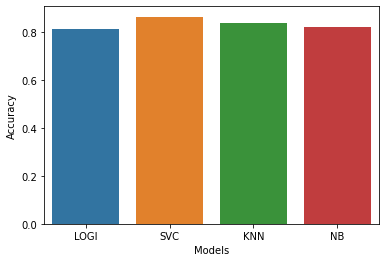

In [61]:
sns.barplot(x = 'Models', y = 'Accuracy', data = final_data)

# **OverSampling (SMOTE)**

**We will now use an oversampling technqiue called SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in the dataset.**

In [62]:
sm=SMOTE(random_state=656)

In [63]:
X_train_os,y_train_os=sm.fit_resample(X_train,y_train)

In [64]:
# Distribution of our target variable after Oversampling
y_train_os.value_counts()

0    6370
1    6370
Name: Churned, dtype: int64

In [65]:
# Distribution of our target variable before Oversampling
y_train.value_counts()

0    6370
1    1630
Name: Churned, dtype: int64

## **1. Logistic Regression with SMOTE**

In [66]:
logi_os = LogisticRegression()

In [67]:
logi_os.fit(X_train_os,y_train_os)

LogisticRegression()

In [68]:
logi_os_pred = logi_os.predict(X_test)

In [69]:
confusion_matrix(y_test,logi_os_pred)

array([[1150,  443],
       [ 142,  265]], dtype=int64)

In [70]:
accuracy_score(y_test,logi_os_pred)

0.7075

In [71]:
print(classification_report(y_test,logi_os_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1593
           1       0.37      0.65      0.48       407

    accuracy                           0.71      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.71      0.73      2000



In [72]:
print('Precision score:', precision_score(y_test,logi_os_pred)*100)
print('Recall score:', recall_score(y_test,logi_os_pred)*100)
print('F1-score:', f1_score(y_test,logi_os_pred)*100)
print('Accuracy:', accuracy_score(y_test,logi_os_pred)*100)

Precision score: 37.429378531073446
Recall score: 65.1105651105651
F1-score: 47.53363228699551
Accuracy: 70.75


## **2. Support Vector Classifier with SMOTE**

In [73]:
sv_os = SVC()

In [74]:
sv_os.fit(X_train_os,y_train_os)

SVC()

In [75]:
sv_os_pred = sv_os.predict(X_test)

In [76]:
confusion_matrix(y_test,sv_os_pred)

array([[1312,  281],
       [ 104,  303]], dtype=int64)

In [77]:
accuracy_score(y_test,sv_os_pred)

0.8075

In [78]:
print(classification_report(y_test,sv_os_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1593
           1       0.52      0.74      0.61       407

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [79]:
print('Precision score:', precision_score(y_test,sv_os_pred)*100)
print('Recall score:', recall_score(y_test,sv_os_pred)*100)
print('F1-score:', f1_score(y_test,sv_os_pred)*100)
print('Accuracy:', accuracy_score(y_test,sv_os_pred)*100)

Precision score: 51.88356164383562
Recall score: 74.44717444717445
F1-score: 61.15035317860746
Accuracy: 80.75


## **3. K Nearest Neighbour with SMOTE**

In [80]:
knn_os = KNeighborsClassifier(n_neighbors=5)

In [81]:
knn_os.fit(X_train_os,y_train_os)

KNeighborsClassifier()

In [82]:
knn_os_pred = knn_os.predict(X_test)

In [83]:
confusion_matrix(y_test,knn_os_pred)

array([[1213,  380],
       [ 129,  278]], dtype=int64)

In [84]:
accuracy_score(y_test,knn_os_pred)

0.7455

In [85]:
print(classification_report(y_test,knn_os_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1593
           1       0.42      0.68      0.52       407

    accuracy                           0.75      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.81      0.75      0.76      2000



In [86]:
print('Precision score:', precision_score(y_test,knn_os_pred)*100)
print('Recall score:', recall_score(y_test,knn_os_pred)*100)
print('F1-score:', f1_score(y_test,knn_os_pred)*100)
print('Accuracy:', accuracy_score(y_test,knn_os_pred)*100)

Precision score: 42.24924012158054
Recall score: 68.3046683046683
F1-score: 52.206572769953056
Accuracy: 74.55000000000001


## **4. Naive Bayes with SMOTE**

In [87]:
nb_os = GaussianNB()

In [88]:
nb_os.fit(X_train_os,y_train_os)

GaussianNB()

In [89]:
nb_os_pred = nb_os.predict(X_test)

In [90]:
confusion_matrix(y_test,nb_os_pred)

array([[1155,  438],
       [ 128,  279]], dtype=int64)

In [91]:
accuracy_score(y_test,nb_os_pred)

0.717

In [92]:
print(classification_report(y_test,nb_os_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1593
           1       0.39      0.69      0.50       407

    accuracy                           0.72      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000



In [93]:
print('Precision score:', precision_score(y_test,nb_os_pred)*100)
print('Recall score:', recall_score(y_test,nb_os_pred)*100)
print('F1-score:', f1_score(y_test,nb_os_pred)*100)
print('Accuracy:', accuracy_score(y_test,nb_os_pred)*100)

Precision score: 38.912133891213394
Recall score: 68.55036855036855
F1-score: 49.644128113879006
Accuracy: 71.7


# **Accuracy Comparision**

In [94]:
final_os_data=pd.DataFrame({'Models':['LOGI_OS','SVC_OS','KNN_OS','NB_OS'],
                         'Accuracy':[accuracy_score(y_test,logi_os_pred),
                                     accuracy_score(y_test,sv_os_pred),
                                     accuracy_score(y_test,knn_os_pred),
                                     accuracy_score(y_test,nb_os_pred)],
                         'precision':[precision_score(y_test,logi_os_pred),
                                      precision_score(y_test,sv_os_pred),
                                      precision_score(y_test,knn_os_pred),
                                      precision_score(y_test,nb_os_pred)],
                         'Recall':[recall_score(y_test,logi_os_pred),
                                   recall_score(y_test,sv_os_pred),
                                   recall_score(y_test,knn_os_pred),
                                   recall_score(y_test,nb_os_pred)],
                         'F1-Score':[f1_score(y_test,logi_os_pred),
                                     f1_score(y_test,sv_os_pred),
                                     f1_score(y_test,knn_os_pred),
                                     f1_score(y_test,nb_os_pred)]})

In [95]:
final_os_data

,Models,Accuracy,precision,Recall,F1-Score
0,LOGI_OS,0.7075,0.374294,0.651106,0.475336
1,SVC_OS,0.8075,0.518836,0.744472,0.611504
2,KNN_OS,0.7455,0.422492,0.683047,0.522066
3,NB_OS,0.7170,0.389121,0.685504,0.496441


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

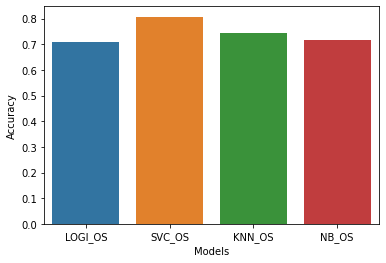

In [96]:
sns.barplot(x = 'Models', y = 'Accuracy', data = final_os_data)

# **Comparing Model accuracy with and without Oversampling**

In [97]:
display(pd.concat([final_data, final_os_data], axis=1))

,Models,Accuracy,precision,Recall,F1-Score,Models,Accuracy,precision,Recall,F1-Score
0,LOGI,0.812,0.596273,0.235872,0.338028,LOGI_OS,0.7075,0.374294,0.651106,0.475336
1,SVC,0.865,0.804444,0.444717,0.572785,SVC_OS,0.8075,0.518836,0.744472,0.611504
2,KNN,0.840,0.658182,0.444717,0.530792,KNN_OS,0.7455,0.422492,0.683047,0.522066
3,NB,0.821,0.595331,0.375921,0.460843,NB_OS,0.7170,0.389121,0.685504,0.496441


# **Conclusion**

**Support Vector Classification (SVC) Metrics :**

**Accuracy : 80.75 %**

**Recall : 74.44 %**

**Precision : 51.88 %**

**F1-Score : 61.15 %**

**Based on the provided metrics, SVC outperforms Logistic Regression, KNN and Naive Bayes in all metrics, demonstrating higher Accuracy, Precision, Recall, and F1-Score. It achieves a good balance between precision and recall, making it suitable for our customer churn prediction task.**

**While metrics like Accuracy and Precision are essential, Recall is particularly crucial in Customer Churn Prediction, as it indicates the ability to identify customers who are likely to Churn. And Support Vector Classification provided us the best Recall value.**



**Hence, we will go with Support Vector Classification (SVC) as our final model as it is quite evident that it performs best for our Bank Customer Churn problem.**